In [1]:
# Jupyter notebooks have problems with imports from parent folder, so let's change the path
from jupyter_utils import change_path_to_parent
change_path_to_parent()

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import numpy.linalg as la
from matplotlib import rc, rcParams
from scipy.sparse import csc_matrix, csr_matrix

from datasets import get_dataset
from first_order import Adgd, AdgdAccel, Gd, Nesterov, Polyak, RestNest
from loss_functions import LogisticRegression

sns.set(style="whitegrid", context="talk", palette=sns.color_palette("bright"), color_codes=False)
rcParams['font.size'] = 20
rc('font', family='sans-serif') 
rcParams['font.family'] = 'Open Sans'
rcParams['mathtext.fontset'] = 'cm'

In [2]:
A, b = get_dataset('news20_class1')
loss = LogisticRegression(A, b, l1=0, l2=0)
n, dim = A.shape
if dim <= 1000:
    L = loss.smoothness()
else:
    L = loss.average_smoothness()
l2 = 1e-5 * L
loss.l2 = l2
x0 = csc_matrix((dim, 1))
it_max = 1000

## Best accelerated method

In [20]:
nest = Nesterov(loss=loss, it_max=it_max)
nest2 = Nesterov(loss=loss, it_max=it_max, strongly_convex=True, mu=l2)
rest = RestNest(loss=loss, it_max=it_max)
rest2 = RestNest(loss=loss, func_condition=True, it_max=it_max)
rest3 = RestNest(loss=loss, it_max=it_max, doubling=True)
adgda = AdgdAccel(loss=loss, it_max=it_max)
accelerated_optimizers = [nest, nest2, rest, rest2, rest3, adgda]
labels = ['Nesterov', 'Nesterov for str. convex', 'Nesterov restarts grad', 
          'Nesterov restarts func', 'Nesterov restarts doubling', 'Accelerated AdGD']
markers = [',', 'o', '^', '*', 'D', 'X']

In [21]:
adgda.run(x0=x0)

In [51]:
gd = Gd(loss=loss, it_max=it_max, lr=1000/L)
gd.run(x0=x0)

In [66]:
gd.compute_loss_of_iterates()
gd.trace.loss_vals[-1] - loss.f_opt

Loss values have already been computed. Set .loss_vals = [] to recompute


2.1160850849355484e-12

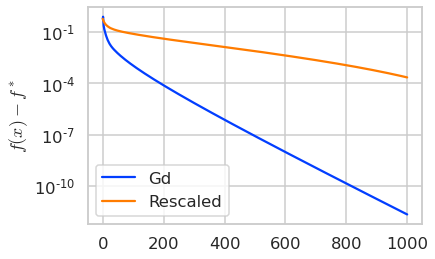

In [69]:
# adgda.trace.plot_losses()
gd.trace.plot_losses(label='Gd')
resc.trace.plot_losses(label='Rescaled')
plt.yscale('log')
plt.legend()

In [5]:
adgda2 = AdgdAccel(loss=loss, it_max=4000, start_with_small_momentum=True)
adgda2.run(x0=x0)

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


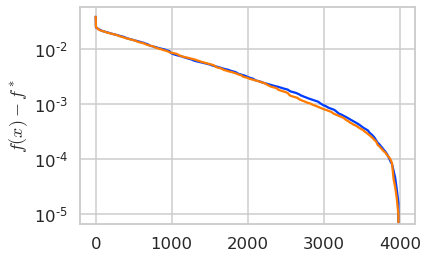

In [7]:
adgda.compute_loss_of_iterates()
adgda.trace.plot_losses()
adgda2.compute_loss_of_iterates()
adgda2.trace.plot_losses()
plt.yscale('log')

Running optimizer: Nesterov
Running optimizer: Nesterov for str. convex
Running optimizer: Nesterov restarts grad
Running optimizer: Nesterov restarts func
Running optimizer: Nesterov restarts doubling
Running optimizer: Accelerated AdGD


findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


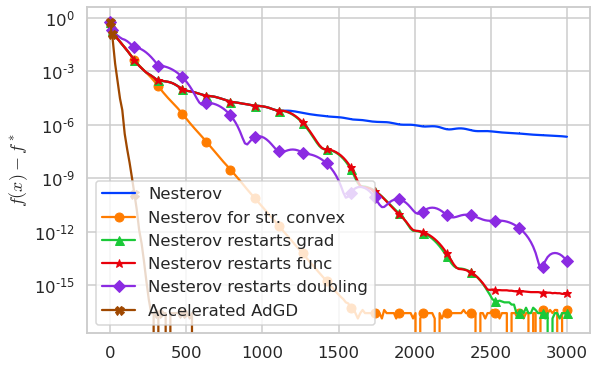

In [4]:
plt.figure(figsize=(9, 6))
for opt in accelerated_optimizers:
    print(f'Running optimizer: {label}')
    opt.run(x0=x0)
    opt.compute_loss_of_iterates()

for opt, label, marker in zip(accelerated_optimizers, labels, markers):
    opt.trace.plot_losses(label=label, marker=marker)
plt.yscale('log')
plt.legend()

## Compare selected

In [5]:
gd = Gd(loss=loss, it_max=n_epoch)
nest = Nesterov(loss=loss, it_max=it_max, strongly_convex=True, mu=l2)

In [ ]:
gd = Gd(loss=loss, it_max=it_max)
rest = RestNest(loss=loss, it_max=it_max)
nest = Nesterov(loss=loss, it_max=n_epoch, strongly_convex=True, mu=l2)
adgd = Adgd(loss=loss, it_max=it_max)
adgda = AdgdAccel(loss=loss, it_max=it_max)
pol = Polyak(loss=loss, it_max=n_epoch, f_opt=loss.f_opt)
optimizers = [gd, nest, rest, adgd, adgda]
labels = ['GD', 'Nesterov', 'Nesterov restarts', 'AdGD', 'Accelerated AdGD', 'Polyak']

#### Todo